# Water Potability Prediction

In [106]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import warnings
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

sb.set()
sb.set_style('darkgrid')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.style.use('seaborn')

warnings.filterwarnings('ignore')

In [125]:
df = pd.read_csv("D:\Open Classroom\Datasets\Drinking Water Potability\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [126]:
df.shape

(3276, 10)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [128]:
round(df.describe())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.0,3276.0,3276.0,3276.0,2495.0,3276.0,3276.0,3114.0,3276.0,3276.0
mean,7.0,196.0,22014.0,7.0,334.0,426.0,14.0,66.0,4.0,0.0
std,2.0,33.0,8769.0,2.0,41.0,81.0,3.0,16.0,1.0,0.0
min,0.0,47.0,321.0,0.0,129.0,181.0,2.0,1.0,1.0,0.0
25%,6.0,177.0,15667.0,6.0,308.0,366.0,12.0,56.0,3.0,0.0
50%,7.0,197.0,20928.0,7.0,333.0,422.0,14.0,67.0,4.0,0.0
75%,8.0,217.0,27333.0,8.0,360.0,482.0,17.0,77.0,5.0,1.0
max,14.0,323.0,61227.0,13.0,481.0,753.0,28.0,124.0,7.0,1.0


In [145]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

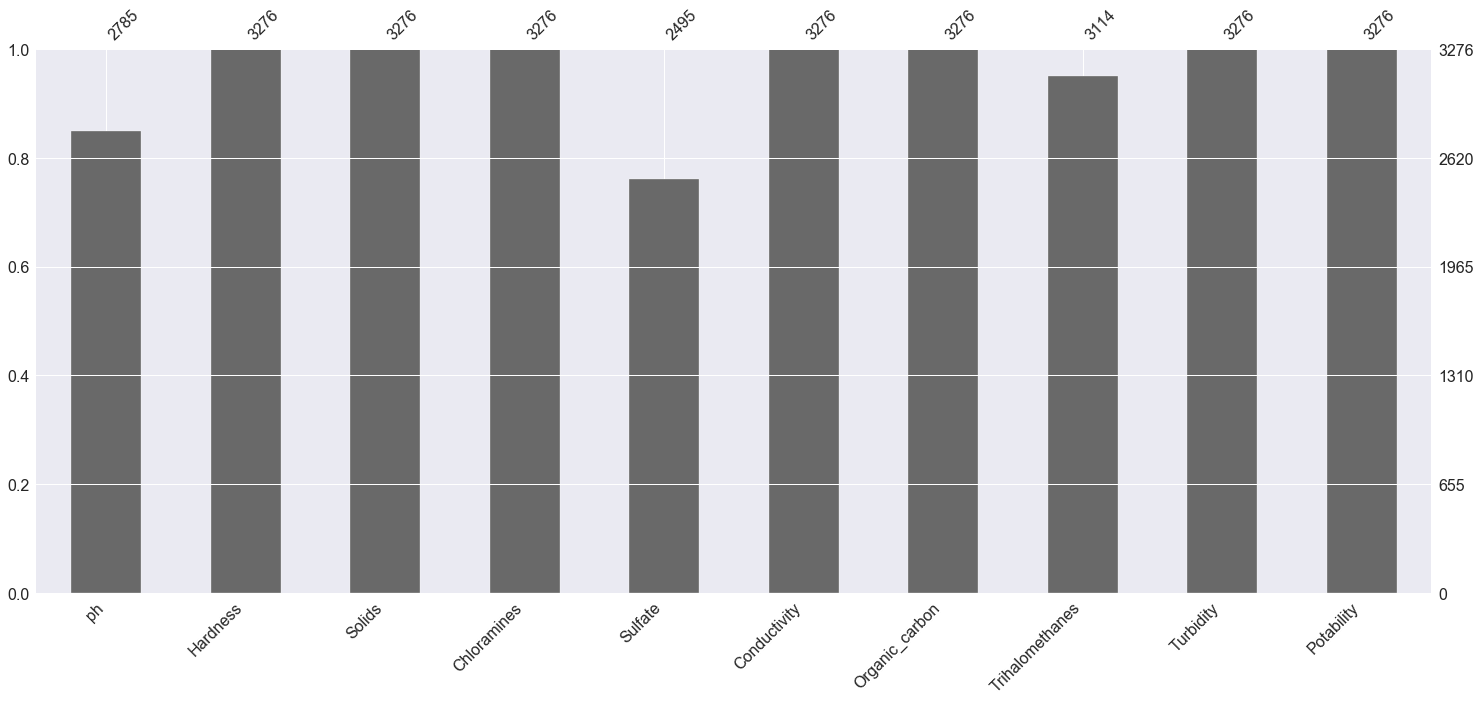

In [130]:
msno.bar(df)

Text(0.5, 1, 'Pearsons Correlation of Columns')

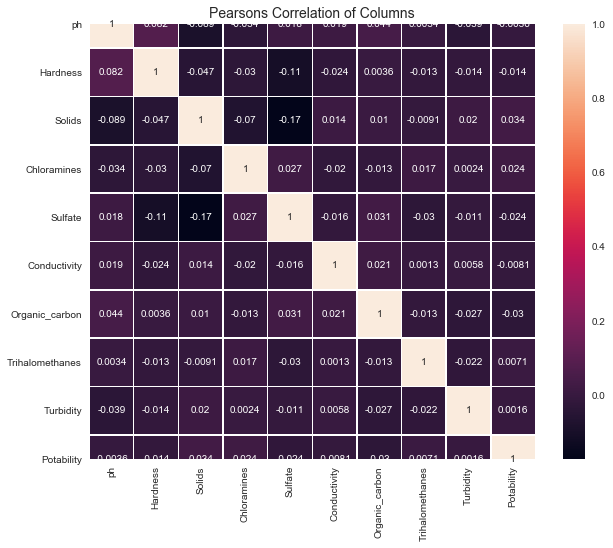

In [131]:
plt.figure(figsize = (10,8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.title('Pearsons Correlation of Columns', fontdict={'size':14})

From the above heatmap graph its clear indication that the dataset columns have no close correlation between the quantitative variables

In [132]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [133]:
def remove_nans(data):
    cat_cols = (data.dtypes == 'object')
    categories = list(cat_cols[cat_cols].index)
    si = SimpleImputer(missing_values=np.nan, strategy='mean')
    for i in categories:
        data[i] = si.fit_transform(data[i])
        
remove_nans(df)

In [134]:
cols = ['ph', 'Sulfate', 'Trihalomethanes']

df['ph'] = df.replace(np.nan, df['ph'].mean)
df['Sulfate'] = df.replace(np.nan, df['Sulfate'].mean)
df['Trihalomethanes'] = df.replace(np.nan, df['Trihalomethanes'].mean)


In [135]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Feature Engineering

In [140]:
x = df.drop(columns = ['Potability'])
y = df['Potability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [141]:
print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (2620, 9)
x test (656, 9)
y train (2620,)
y test (656,)


In [142]:
def model_evaluation(model):
    
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    print('')
    print('Accuracy :', accuracy_score(y_test, pred))
    # print('F1 Score :', f1_score(y_test, pred))
    print('Recall Score :', recall_score(y_test, pred))

In [144]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

models = {
    dtc : DecisionTreeClassifier(),
    rfc : RandomForestClassifier(),
    gbc : GradientBoostingClassifier(),
}

for i in models.keys():
    model_evaluation(i)

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test, pred))